#### Dataset: https://www.kaggle.com/c/rossmann-store-sales

#### Data Set Information:

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

#### Attributes Information:

We have the following informations from rossmann in two different tables:

  1. train.csv
  
    Id — an Id that represents a (Store, Date) duple within the test set
    
    Store — a unique Id for each store
    
    Sales — the turnover for any given day (this is what you are predicting)
    
    Customers — the number of customers on a given day
    
    Open — an indicator for whether the store was open: 0 = closed, 1 = open
    
    StateHoliday — indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
    
    SchoolHoliday — indicates if the (Store, Date) was affected by the closure of public schools
    
  2. store.csv

    StoreType — differentiates between 4 different store models: a, b, c, d
    
    Assortment — describes an assortment level: a = basic, b = extra, c = extended
    
    CompetitionDistance — distance in meters to the nearest competitor store
    
    CompetitionOpenSince [Month/Year] — gives the approximate year and month of the time the nearest competitor was opened
    
    Promo — indicates whether a store is running a promo on that day
    
    Promo2 — Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
    
    Promo2Since[Year/Week] — describes the year and calendar week when the store started participating in Promo2
    
    PromoInterval — describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. “Feb, May ,Aug, Nov” means each round starts in February, May, August, November of any given year for that store

In our problem we have obtained sales data of 1115 Rossmann store located all over Germany from 01–01–2013 to 31–07–2015. The task is to forecast the sales for the next 6 weeks, i.e., from 01–01–2015 to 17–09–2015 for the stores provided in the in the test dataset.

_________________

In [1]:
# Importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt # Matlab-style plotting
from datetime import datetime
%matplotlib inline
plt.style.use("ggplot") # to make the plots to look nicer

import warnings 
warnings.filterwarnings('ignore') #to ignore if any warnings takes place during the run time.

In [2]:
# Loading the dataset 

train = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\Data\train.csv")
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Loading the dataset 

store = pd.read_csv(r"C:\Users\karth\Desktop\Timeseries_Task\Data\store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Here we got dataset in two different files train.csv and store.csv. First let us analyzie the data and merge them before model building**

#### Step-1

Once the dataset and business needs, problems are given we need to generate Hypothesis.

#### Hypothesis Generation

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

##### Example:

#### Hypothesis Questions

    1. Which store type has more sales and customers?

    2. Which store type has less sales and customers?

    3. Which day of the week(Ex: Mon,Tues,Wed,Thus,Fri,Sat,Sun) customers sales are high?

    4. Are promotion(promo) and second promotion(promo2) are helping to make more sales?

    5. Which day of the week(Ex: Mon,Tues,Wed,Thus,Fri,Sat,Sun) promotions are more?

#### Step-2

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

    Problem definition (what do we want to solve)
    Variable Identification (what data do we have)
    Univariate Analysis (understanding each field in the dataset)
    Bi-variate Analysis (understanding the interactions between different fields and target)
    Missing values treatment (machine learning algorithms hates fields with missing data)
    Outlier treatment
    Variable transformation (Feature Engineering)
    Variable creation (Feature Engineering)

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

### Exploratory Data Analysis

1. Brief look at the dataset
2. See the shape of the dataset
3. See the variables datatypes
4. See the number of missing/null values
5. See the number of unique values in each variable

In [4]:
"""
Pandas describe() is used to view some basic statistical details like count, percentiles, mean, 
std, and maximum value of a data frame or a series of numeric values.
"""
## Descriptive Analysis

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
train.describe().transpose() #using transpose function on describe function

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [6]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
store.describe().transpose() #using transpose function on describe function

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


#### Step-3 (Variable Identification)

First, identify Predictor (Input) and Target (output) variables. 

Next, identify the data type and category of the variables.

Variables are of two types — Numerical and Categorical. 

They can be further classified as follows:

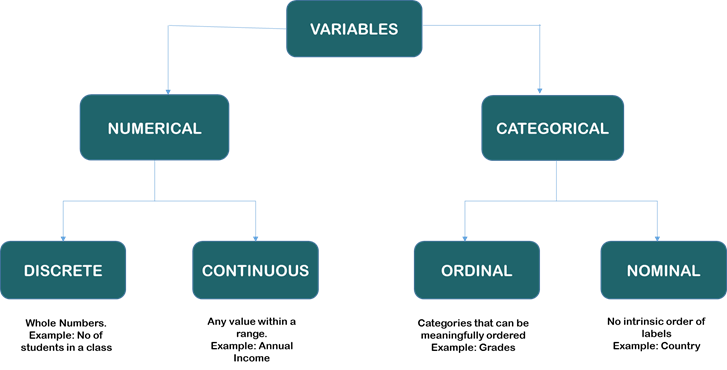

In [8]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\1.png')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**We can see that train.csv has 7 numeric and 2 catogorical, store.csv has 7 numeric and 3 categorical**

In [11]:
train.skew()  # will show you the skewness of each column numerical

Store           -0.000955
DayOfWeek        0.001593
Sales            0.641460
Customers        1.598650
Open            -1.758045
Promo            0.487838
SchoolHoliday    1.677842
dtype: float64

In [12]:
store.skew()  # will show you the skewness of each column numerical

Store                        0.000000
CompetitionDistance          2.929286
CompetitionOpenSinceMonth   -0.170750
CompetitionOpenSinceYear    -8.013062
Promo2                      -0.048510
Promo2SinceWeek              0.074057
Promo2SinceYear             -0.119616
dtype: float64

In [13]:
train.dtypes #lets have a look at data  types of attributes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [14]:
store.dtypes #lets have a look at data  types of attributes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [15]:
# Finding the shape of dataset

print(f"Train data contains {train.shape[0]} samples/rows and {train.shape[1]} features/variables/columns")
print("---"*25)
print(f"Store data contains {store.shape[0]} samples/rows and {store.shape[1]} features/variables/columns")

Train data contains 1017209 samples/rows and 9 features/variables/columns
---------------------------------------------------------------------------
Store data contains 1115 samples/rows and 10 features/variables/columns


#### Step-4 (Non-Graphical Univariate Analysis)

##### To get the count of unique values

The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column.

##### To get the list & number of unique values

The unique() function of pandas returns the list of unique values in the dataset.

In [16]:
"""The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column."""

train['StateHoliday'].value_counts(normalize = True) # normalize = True , will return percentage according to frequency

0    0.840621
0    0.128855
a    0.019917
b    0.006577
c    0.004031
Name: StateHoliday, dtype: float64

Text(0.5, 1.0, 'StateHoliday')

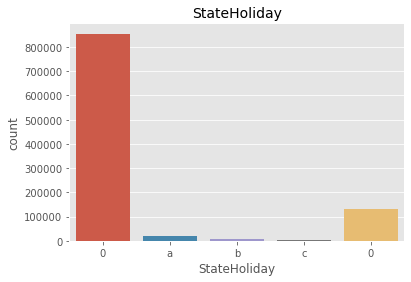

In [17]:
# Let's use countplot() function from seaborn library to visualize StateHoliday variable

sns.countplot(train['StateHoliday'])
plt.title("StateHoliday",fontsize=14)

#### **StateHoliday: Indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

**As we can see State Holidays are very less**

In [18]:
store['StoreType'].value_counts(normalize = True)

a    0.539910
d    0.312108
c    0.132735
b    0.015247
Name: StoreType, dtype: float64

Text(0.5, 1.0, 'StoreType')

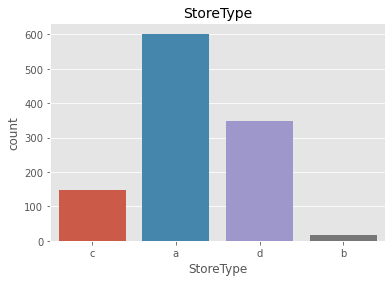

In [19]:
# Let's use countplot() function from seaborn library to visualize StoreType variable

sns.countplot(store['StoreType'])
plt.title("StoreType",fontsize=14)

#### **StoreType: 4 different stores : a, b, c, d**

**As we can see store ' a ' has more sales followed by ' d ',' c ',' b '**

In [20]:
store['Assortment'].value_counts(normalize = True)

a    0.531839
c    0.460090
b    0.008072
Name: Assortment, dtype: float64

Text(0.5, 1.0, 'Assortment')

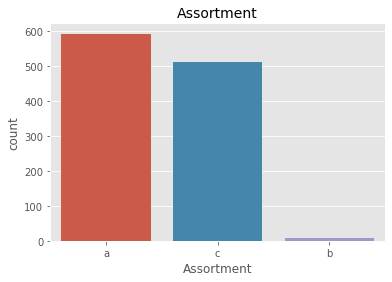

In [21]:
# Let's use countplot() function from seaborn library to visualize Assortment variable

sns.countplot(store['Assortment'])
plt.title("Assortment",fontsize=14)

#### **Assortment: a = basic, b = extra, c = extended**

**Assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.**

**As we can see more basic products are displayed followed by extra products**

In [22]:
store['PromoInterval'].value_counts(normalize = True)

Jan,Apr,Jul,Oct     0.586690
Feb,May,Aug,Nov     0.227671
Mar,Jun,Sept,Dec    0.185639
Name: PromoInterval, dtype: float64

Text(0.5, 1.0, 'PromoInterval')

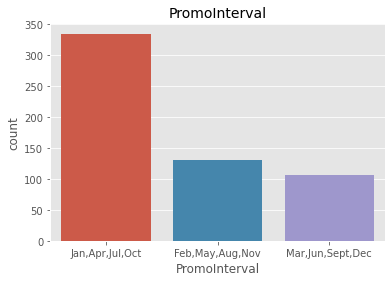

In [23]:
# Let's use countplot() function from seaborn library to visualize PromoInterval variable

sns.countplot(store['PromoInterval'])
plt.title("PromoInterval",fontsize=14)

##### PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### Step-5 (Filtering based on Conditions)

Datasets can be filtered using different conditions, which can be implemented using logical operators in python. For example, == (double equal to), ≤ (less than or equal to), ≥(greater than or equal to), etc.

#### Step-6 (Data Type Conversion)

Pandas astype() method is used to change the data type of a column. 

to_datetime() method is used to change, particularly to DateTime type.

### **Checking data when the stores were closed**

In [24]:
train_store_closed = train[(train.Open == 0)]

array([[<AxesSubplot:title={'center':'DayOfWeek'}>]], dtype=object)

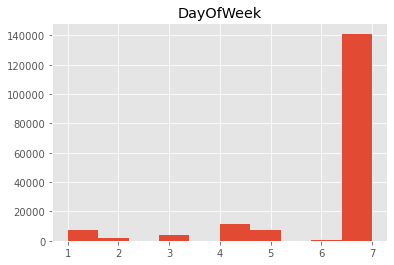

In [25]:
# Checking days when the stores were closed

train_store_closed.hist('DayOfWeek')

#### **As we can see at Day ' 7 ' store is closed mostly. This day can be sunday**

### Checking whether there was a school holiday when the store was closed

<AxesSubplot:>

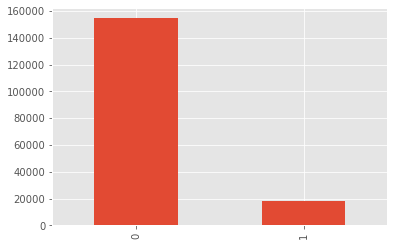

In [26]:
# Checking whether there was a school holiday when the store was closed

train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar')

### Checking whether there was a state holiday when the store was closed

<AxesSubplot:>

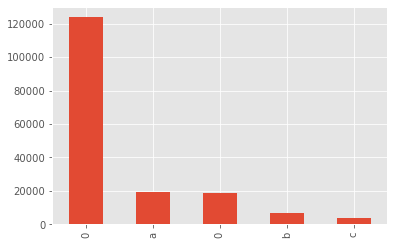

In [27]:
# Checking whether there was a state holiday when the store was closed

train_store_closed['StateHoliday'].value_counts().plot(kind='bar')

**On other days, they were closed because of a school holiday or/and a state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None).**

### Number of days with closed stores

In [28]:
# Number of days with closed stores

train[(train.Open == 0)].shape[0]

172817

### Number of days when store was opened but zero sales

In [29]:
# Number of days when store was opened but zero sales - might be because of external factors or refurbishmnent

train[(train.Open == 1) & (train.Sales == 0)].shape[0]

54

### lets look at the sales

In [30]:
# Sales: The turnover on a given day (our target variable)

opened_sales = (train[(train.Open == 1) & (train.Sales)]) #if the stores are opened

<AxesSubplot:title={'center':'Sales Boxplot'}>

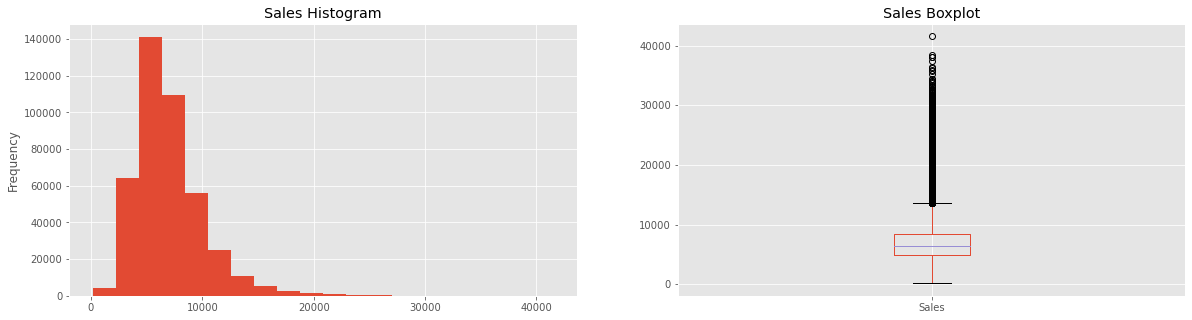

In [31]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])

In [32]:
##--------------Based on box plot--------------------

print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10.000 Euros")
print("----"*16)
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000 Euros")

Rossmann has 13.45 % of the time big sales, over 10.000 Euros
----------------------------------------------------------------
Rossmann has 0.0277 % of the time low sales, under 1000 Euros


### lets look at the customers

<AxesSubplot:title={'center':'Sales Boxplot'}>

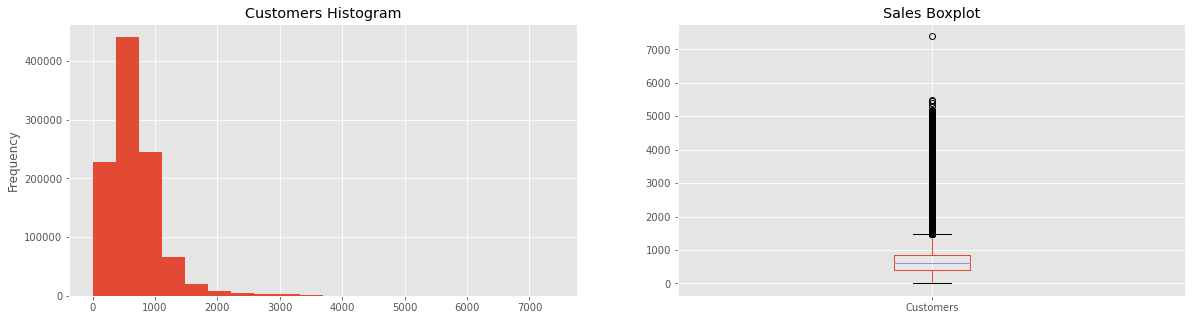

In [33]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
train.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])

In [34]:
##--------------Based on box plot--------------------

train[(train.Customers > 6000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


#### **As we can see in box plot there where 7388 customers in a day**         ---Jackpot---

In [35]:
print("----"*25)
print("In 3 years, different stores where", train[(train.Open == 0)].count()[0], "times closed")
print("----"*25)
print("From this days,", train[(train.Open == 0) & ((train.StateHoliday == "a") | (train.StateHoliday == "b") | (train.StateHoliday == "c"))].count()[0], 
      "times the stores were closed because of holidays")
print("----"*25)
print(train[(train.Open == 0) & (train.SchoolHoliday == 1)].count()[0], "times, some stores were closed because of school holiday")
print("----"*25)
print("The stores were in some sundays opend ->", train[(train.Open == 1) & (train.DayOfWeek == 7)].count()[0], "times")
print("----"*25)
print("However,", train[(train.Open == 0) & ((train.StateHoliday == "0") | (train.StateHoliday == 0)) & (train.SchoolHoliday == 0)].count()[0], 
      "times, the stores were closed for no reason (No Holidays o Sunday)")
print("----"*25)

----------------------------------------------------------------------------------------------------
In 3 years, different stores where 172817 times closed
----------------------------------------------------------------------------------------------------
From this days, 30140 times the stores were closed because of holidays
----------------------------------------------------------------------------------------------------
18264 times, some stores were closed because of school holiday
----------------------------------------------------------------------------------------------------
The stores were in some sundays opend -> 3593 times
----------------------------------------------------------------------------------------------------
However, 139610 times, the stores were closed for no reason (No Holidays o Sunday)
----------------------------------------------------------------------------------------------------


### lets look at Promotion

In [36]:
print("----"*25)
print(round((train.Promo[train.Promo == 1].count() / train.shape[0] * 100), 2), "% of the time, has been promotions made")
print("----"*25)
print(round((store.Promo2[store.Promo2 == 1].count() / store.shape[0] * 100), 2), "% of the time, has been second promotions made")
print("----"*25)
print(round((store.Promo2SinceWeek[store.Promo2SinceWeek == 1].count() / store.shape[0] * 100), 2), "% of the time, has been Promo2SinceWeek made")
print("----"*25)
print(round((store.Promo2SinceYear[store.Promo2SinceYear == 1].count() / store.shape[0] * 100), 2), "% of the time, has been Promo2SinceYear made")
print("----"*25)

----------------------------------------------------------------------------------------------------
38.15 % of the time, has been promotions made
----------------------------------------------------------------------------------------------------
51.21 % of the time, has been second promotions made
----------------------------------------------------------------------------------------------------
3.14 % of the time, has been Promo2SinceWeek made
----------------------------------------------------------------------------------------------------
0.0 % of the time, has been Promo2SinceYear made
----------------------------------------------------------------------------------------------------


In [37]:
# Checking unique values in each variable

"""The unique() function of pandas returns the list of unique values in the dataset."""

train.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [38]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

### Checking for null values

In [39]:
# Checking for null values

train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<AxesSubplot:>

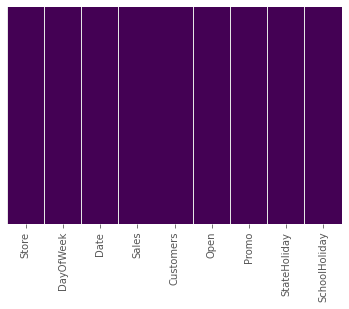

In [40]:
# Visualiation of missing value in heat map

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
# Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

SchoolHoliday    0.0
StateHoliday     0.0
Promo            0.0
Open             0.0
Customers        0.0
Sales            0.0
Date             0.0
DayOfWeek        0.0
Store            0.0
dtype: float64

In [42]:
# Checking for null values

store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:>

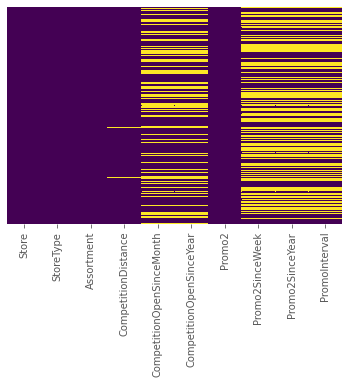

In [43]:
# Visualiation of missing value in heat map

sns.heatmap(store.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
# Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (store.isnull().sum()/store.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

PromoInterval                48.8
Promo2SinceYear              48.8
Promo2SinceWeek              48.8
CompetitionOpenSinceYear     31.7
CompetitionOpenSinceMonth    31.7
CompetitionDistance           0.3
Promo2                        0.0
Assortment                    0.0
StoreType                     0.0
Store                         0.0
dtype: float64

**Only 3 observations have 'Competition Distance' missing. This is probably because someone didn't enter the information in the system. It's safe to replace these missing values with the median. We can't use the same approach with competition's existence (month and year) as it doesn't make sense. It is better to replace it with 0 (i.e launched recently). We'll also impute the missing values in promo with 0 as no information about promo is avaialable.**

#### train.csv has no null values but store.csv has null values. Let's analyse and impute them

In [45]:
# Removal of duplicate rows

print(f"Before removing duplicate rows {train.shape[0]} and columns {train.shape[1]}")

train = train.drop_duplicates()

print(f"\nAfter removing duplicate rows {train.shape[0]} and columns {train.shape[1]}")

print("---"*20)

print(f"Before removing duplicate rows {store.shape[0]} and columns {store.shape[1]}")

store = store.drop_duplicates()

print(f"\nAfter removing duplicate rows {store.shape[0]} and columns {store.shape[1]}")

Before removing duplicate rows 1017209 and columns 9

After removing duplicate rows 1017209 and columns 9
------------------------------------------------------------
Before removing duplicate rows 1115 and columns 10

After removing duplicate rows 1115 and columns 10


#### **We can see that there are no duplicate rows because data is time series**

### Missing value imputation

#### lets look at **CompetitionDistance** variable

The median is --->  2325.0 and mean is --->  5404.901079136691


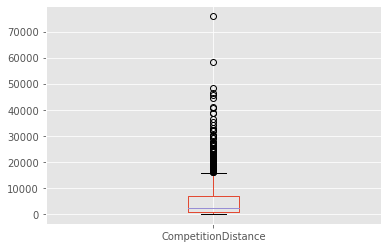

In [46]:
store.CompetitionDistance.plot.box() #let me see the outliers, so we can choose between mean and median to fill the NaNs

print("The median is ---> ", store.CompetitionDistance.median(), "and mean is ---> ", store.CompetitionDistance.mean())

#### Since we have here some outlier, its better to input the median value to those few missing values

In [47]:
# Replacing missing values for Competiton distance with median

store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

#### lets look at **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear** variables

In [48]:
# The missing values, are not there, because the stores had no competition. So it's better to fill the missing values with zeros.

store["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store["CompetitionOpenSinceYear"].fillna(0, inplace = True)

# so if no promotion(promo) has been made, then we should replace the NaN from Promo since Week and Year with zero

store["Promo2SinceWeek"].fillna(0, inplace = True)
store["Promo2SinceYear"].fillna(0, inplace = True)
store["PromoInterval"].fillna(0, inplace = True)

In [49]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### **Joining two csv tables or files** , so we can go on with our analysis.

In [50]:
data = pd.merge(train, store, how = "left", on = "Store")

# -------OR-----------

#data = pd.merge(train, store, on='Store', how='inner')

In [51]:
data.head().append(data.tail()) #show the first and last 5 rows.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [52]:
data.shape

(1017209, 18)

### lets delete the times, where the stores were opened with no sales because of days in inventory.

**So, we have 172,871 observations when the stores were closed or have zero sales. 
We can drop these rows in order to do data analysis but we can still keep them for predictive modelling because our models will be able to understand the trend behind it.**

In [53]:
data = data.drop(data[(data.Open == 0) & (data.Sales == 0)].index)

data = data.reset_index(drop = True) # to get the indexes back to 0, 1, 2,etc.

data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
844391,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,0.0,0.0,0


In [54]:
data.shape

(844392, 18)

### Analyzing each variable and their relationships

##### For each feature type we will perform two types of analysis

##### Univariate: Analyze one feature at a time

##### Bivariate: Analyze two features at a time (Relation between each input feature and target feature)

#### Step-7 (Graphical Univariate Analysis)

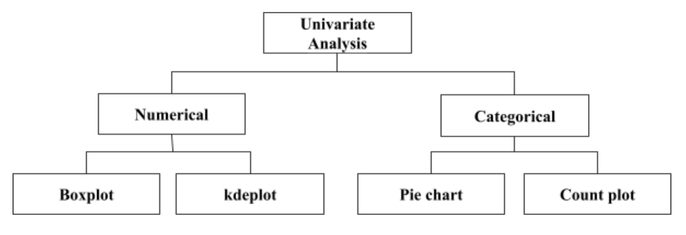

In [55]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\200.jpg')

#### Box Plots:

A Box Plot is the visual representation of the statistical summary of a given data set.

The Summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum

It is also used to identify the outliers in the dataset.

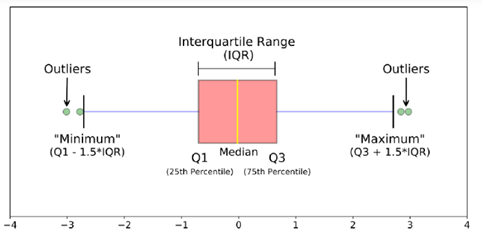

In [56]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\3.png')

#### KDE Plot (Density Plot)

    KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
    It depicts the probability density at different values in a continuous variable. 
    We can also plot a single graph for multiple samples which helps in more efficient data visualization.

#### Pie chart

    Pie charts are generally used to show percentage or proportional data and usually the percentage represented by each category is provided next to the corresponding slice of pie. 
    Pie charts are good for displaying data for around 6 categories or fewer.

#### Count Plots

    A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.


#### Histogram:

    Histograms are one of the most common graphs used to display numeric data. 
    Histograms two important things we can learn from a histogram:

    distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
    To identify outliers — Extremely low or high values that do not fall near any other data points.

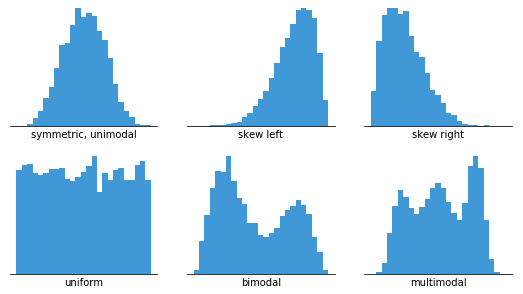

In [57]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\2.png')

#### Step-8 (Graphical Bivariate Analysis)

    Bi-variate Analysis finds out the relationship between two variables. 
    Here, we look for association and dissociation between variables at a pre-defined significance level. 
    We can perform bi-variate analysis for any combination of categorical and continuous variables. 
    The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
    Different methods are used to tackle these combinations during the analysis process.

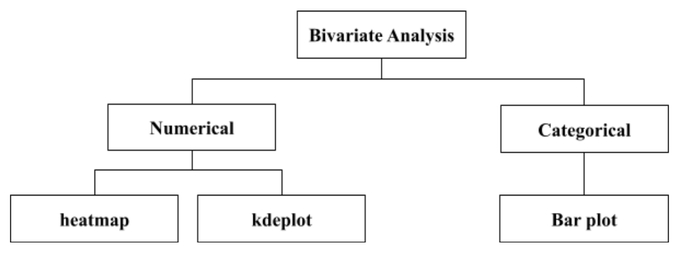

In [58]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\100.jpg')

#### heatmap

    heatmap is used to find the correlation 
    A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 
    The seaborn python package allows the creation of annotated heatmaps.

#### Bar plot

    Histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data.

In [59]:
# Displaying column names

print(data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [60]:
data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

##### Segregating catogorical and numerical variables

In [61]:
#cat_cols = data.loc[:,data.dtypes==np.object] # getting catogorical columns from dataframe like this
#cat_cols
#------------------------------------------------------OR-------------------------------------------------------------
"""
print("Continuous Variables","\n")
num_cols = data.describe().columns
print(num_cols)
"""
"""
print("Categorical Variables","\n")
cat_cols = data.describe(include=[object]).columns
print(cat_cols)
"""
#------------------------------------------------------OR-------------------------------------------------------------

cat_cols = ['StateHoliday','StoreType','Assortment','PromoInterval','Date']

In [62]:
num_cols = [c for c in data if c not in cat_cols] # getting numeric columns from dataframe like this
print(num_cols)

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


#### Univariate Analysis of categorical features - countplot

A way of looking at the counts of each of the catogories is countplots.

These are similar to barplots with the width of the bars representing the count of the category in the variable

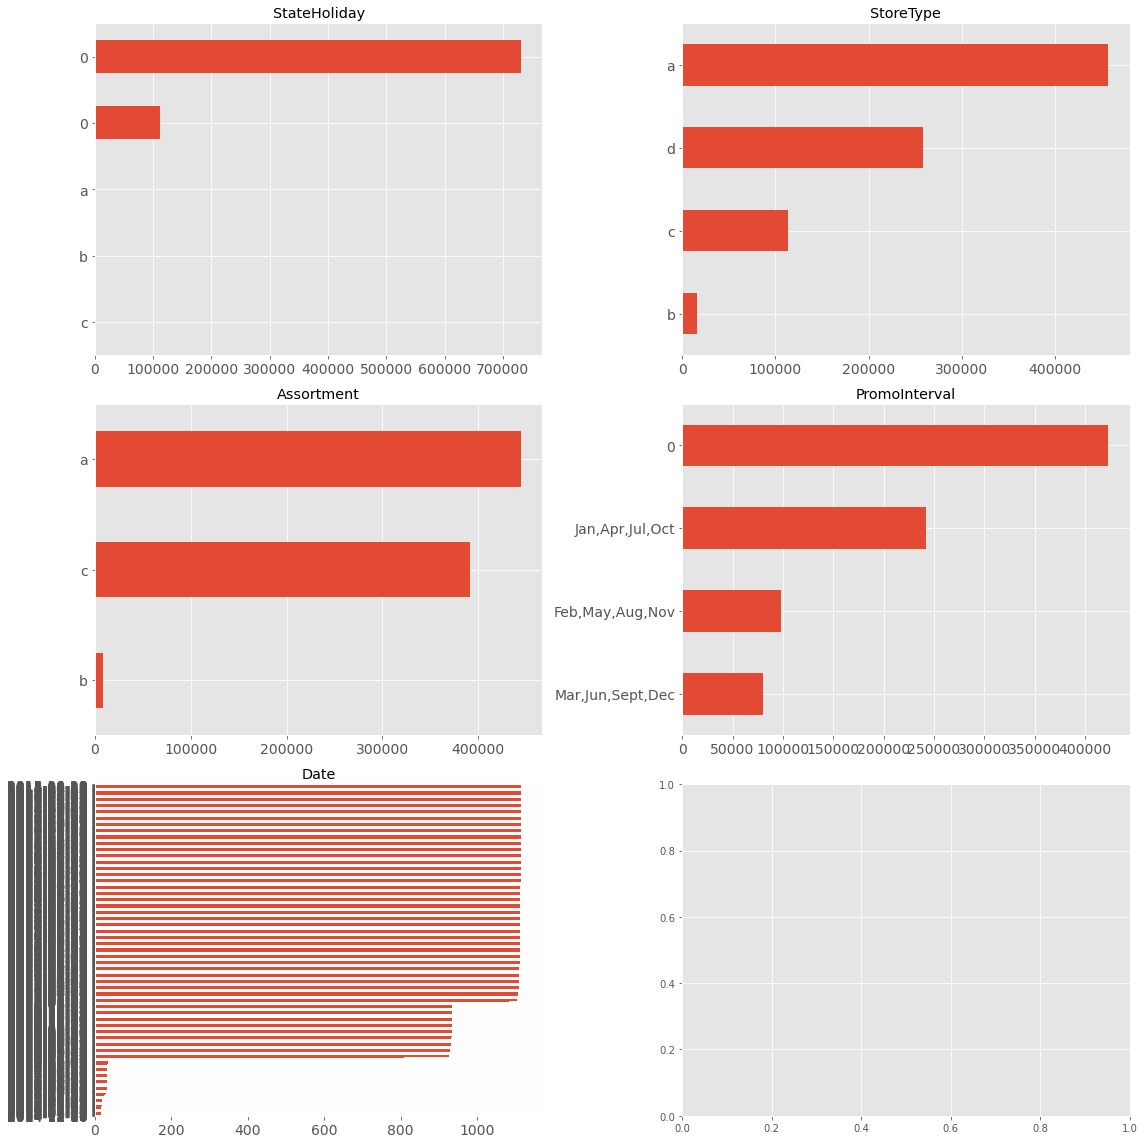

In [63]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16)) #total 6 subplots that's why 3*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
_ = plt.tight_layout()

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

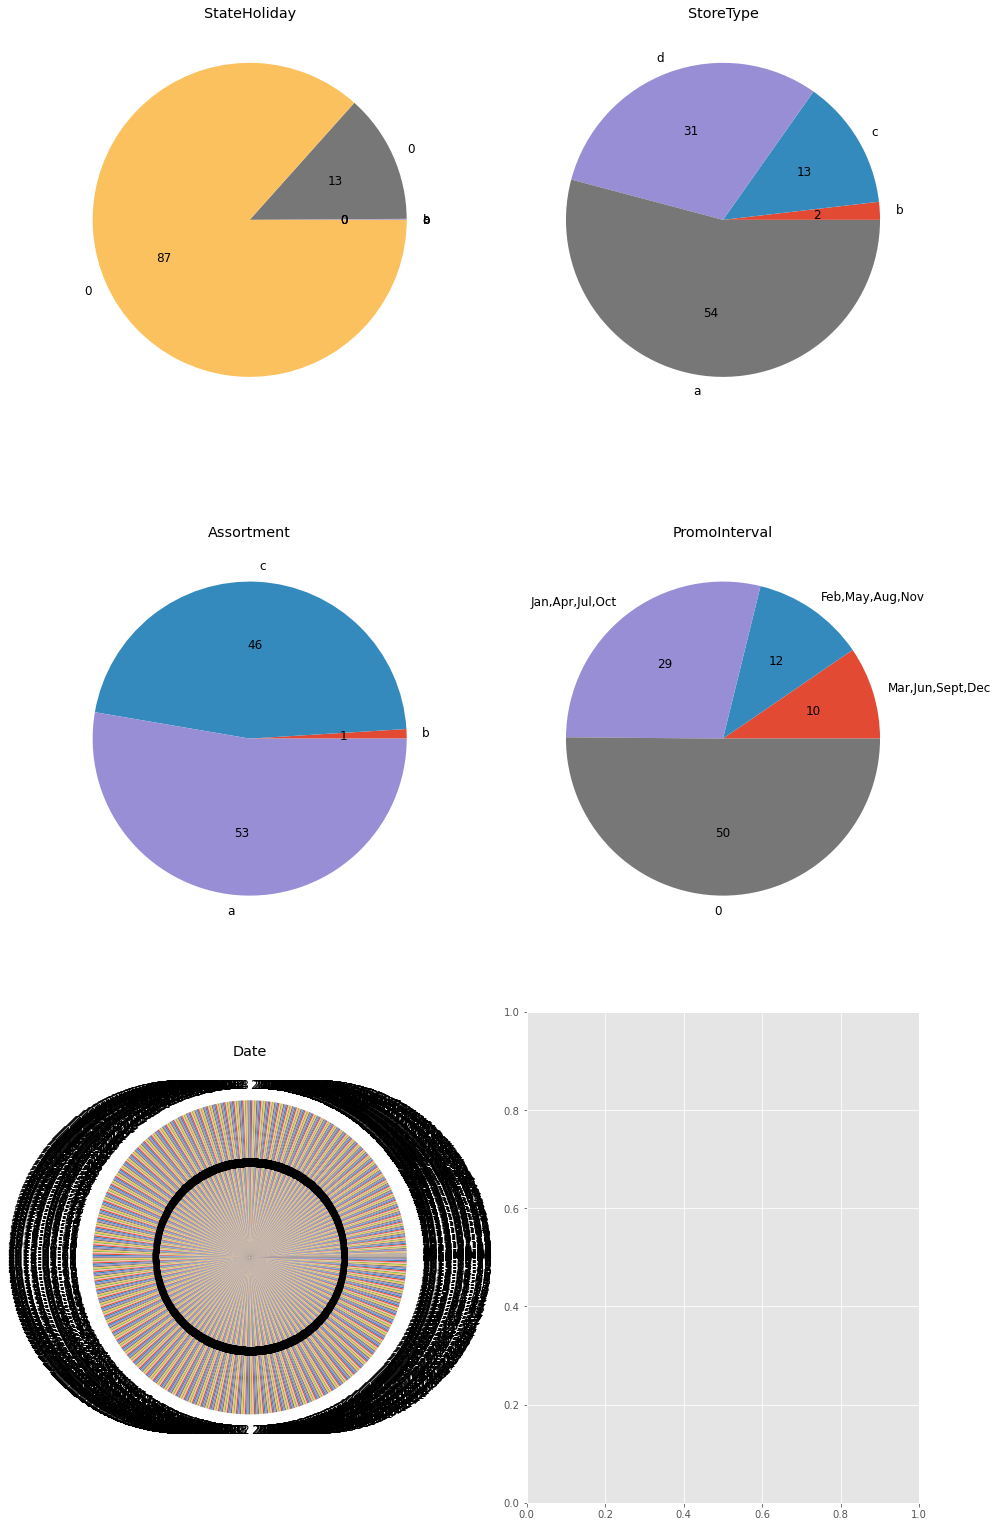

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### Bivariate Analysis: Relationship between catogorical features with target

#### Univariate Analysis for continuous variables

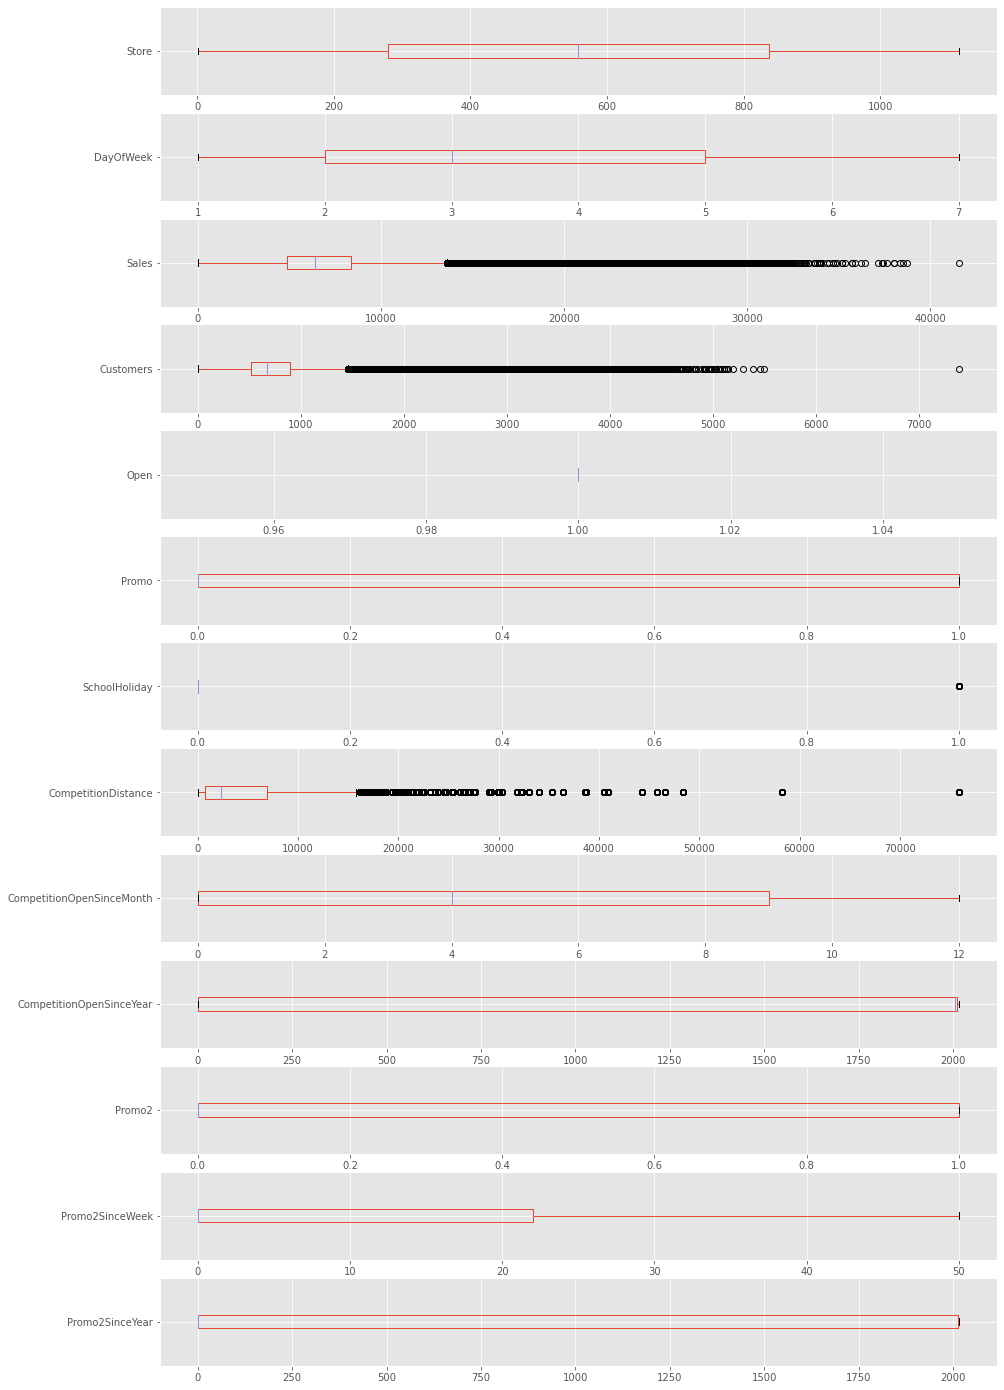

In [65]:
## Using Boxplots

fig, axes = plt.subplots(13,1, figsize=(15,25))
for i, c in enumerate(num_cols):
    _ = data[[c]].boxplot(ax=axes[i], vert=False)

### Outliers

In [66]:
data1 = data.copy()

In [67]:
# Outliers can be removed by using z-score and IQR formula

## Code to remove outliers in our dataset
## After removing the outliers the few rows gets deleted

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

#print(IQR)

#print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.shape

#------------------------------------------------------------------------------------------------

#from scipy import stats
#import numpy as np

#z = np.abs(stats.zscore(data))
#print(z)

# Setting threshold value. If the datapoint is more than mentioned threshold value the we remove them
#threshold = 3
#print(np.where(z > 3))

#data1 = data[(z < 3).all(axis=1)]
#data1.shape

(576306, 18)

#### What to do if we have skewed data?

##### We need to do any of the thing mentioned below

    LOG TRANSFORMATION
    
    SQUARE ROOT TRASFORMATION
    
    BOX-COX TRANSFORMATION
    
##### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

#### Univariate Analysis for continuous variables

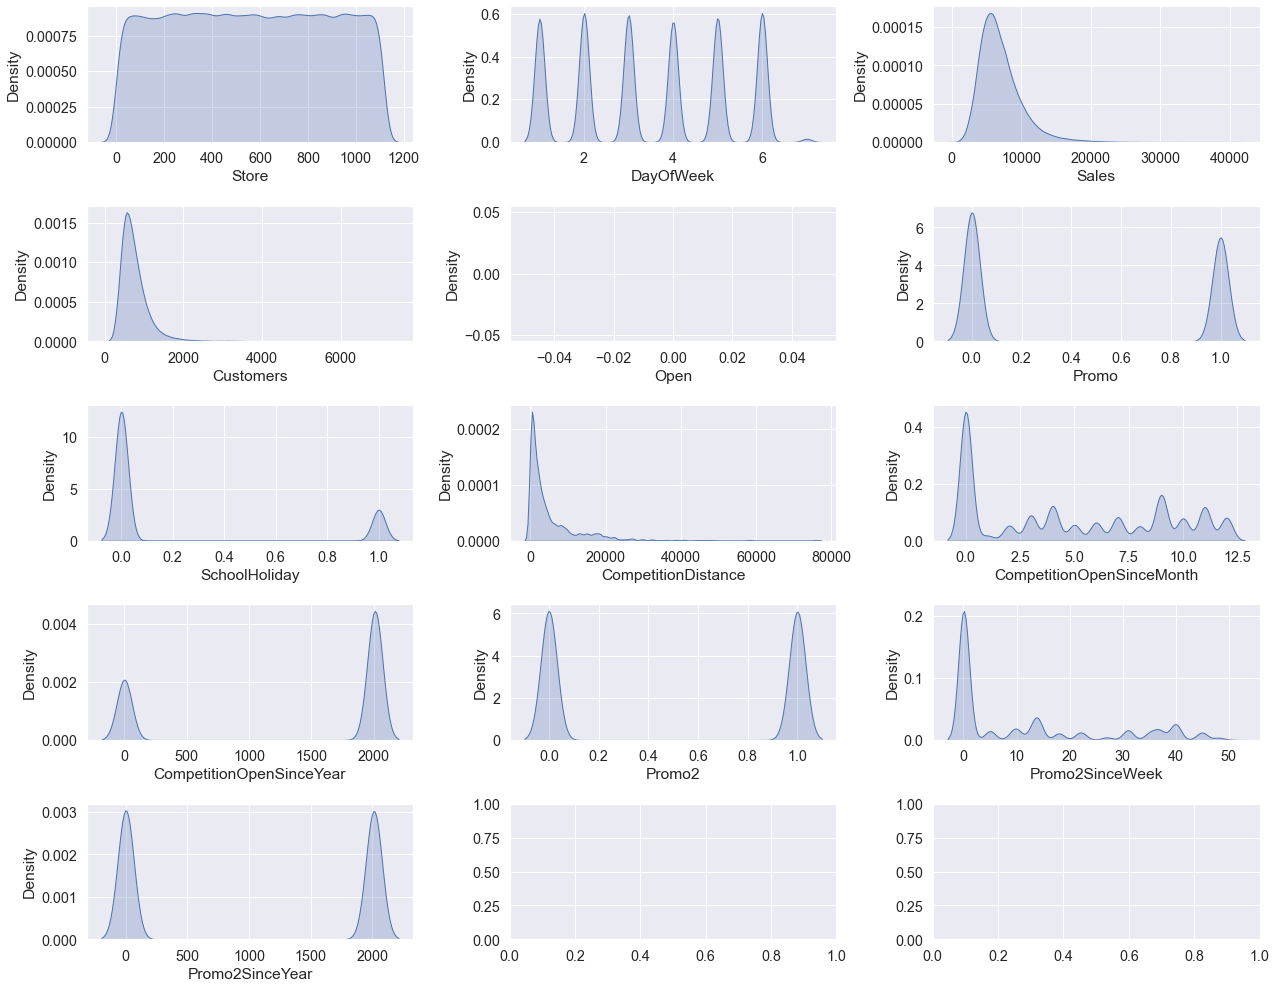

In [68]:
## Density plot

# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale = 1.3)
fig, axes = plt.subplots(5, 3, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

#### Bivariate Analysis: Relationship between numerical and target variable

#### Bivariate Analysis - Correlation Heatmaps

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [69]:
data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000346,0.007710,0.033977,NaN,-0.000012,0.000512,-0.027084,-0.032555,-0.008152,0.007736,0.010857,0.007768
DayOfWeek,0.000346,1.000000,-0.178736,-0.097266,NaN,-0.289265,-0.139315,0.005533,-0.000834,-0.001303,-0.003241,-0.002736,-0.003238
Sales,0.007710,-0.178736,1.000000,0.823597,NaN,0.368145,0.038617,-0.035851,-0.018370,0.005266,-0.127596,-0.058476,-0.127621
Customers,0.033977,-0.097266,0.823597,1.000000,NaN,0.182846,0.024902,-0.147797,-0.021006,0.001666,-0.202232,-0.130841,-0.202204
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.000012,-0.289265,0.368145,0.182846,NaN,1.000000,0.028964,-0.002393,0.000711,0.000990,-0.000324,-0.000802,-0.000326
SchoolHoliday,0.000512,-0.139315,0.038617,0.024902,NaN,0.028964,1.000000,-0.004258,-0.000131,0.000126,-0.008245,-0.008062,-0.008248
CompetitionDistance,-0.027084,0.005533,-0.035851,-0.147797,NaN,-0.002393,-0.004258,1.000000,-0.032081,-0.001216,-0.141316,-0.123998,-0.141380
CompetitionOpenSinceMonth,-0.032555,-0.000834,-0.018370,-0.021006,NaN,0.000711,-0.000131,-0.032081,1.000000,0.785326,-0.082561,-0.109522,-0.082488
CompetitionOpenSinceYear,-0.008152,-0.001303,0.005266,0.001666,NaN,0.000990,0.000126,-0.001216,0.785326,1.000000,-0.098571,-0.125080,-0.098503


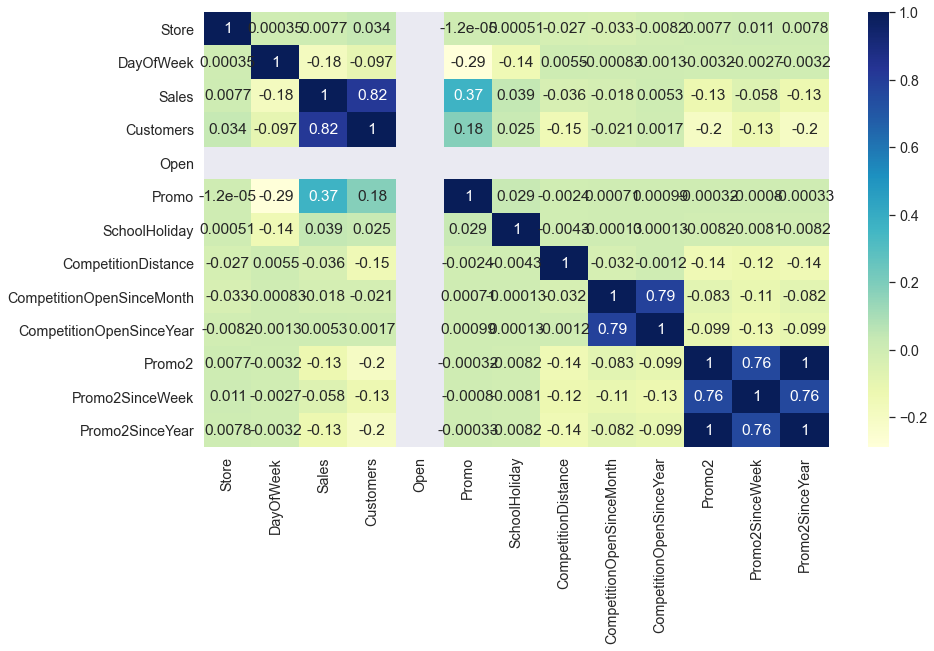

In [70]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data.corr(), annot=True,cmap='YlGnBu') #cmap="RdYlGn" #cmap=plt.cm.CMRmap_r

### lets compare the stores by Sales, Customers, etc.

In [71]:
data["Avg_Customer_Sales"] = data.Sales / data.Customers

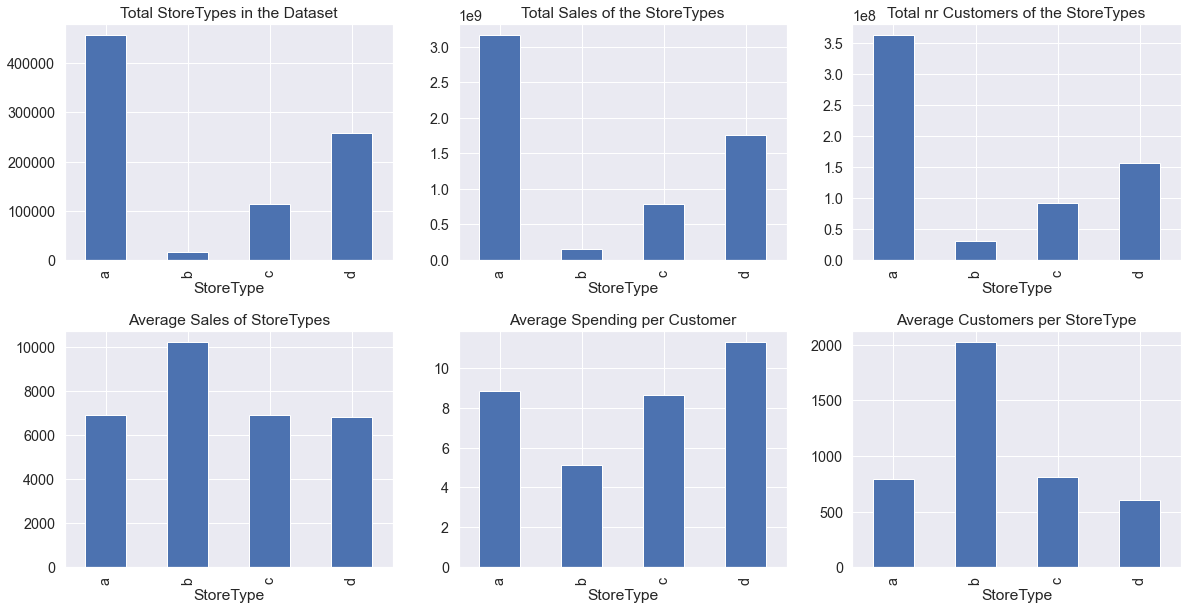

In [72]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

data.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")

data.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")

data.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")

data.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")

data.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")

data.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

### lets check Assortments

In [73]:
data['Assortment'].value_counts()

a    444909
c    391271
b      8212
Name: Assortment, dtype: int64

<AxesSubplot:xlabel='StoreType', ylabel='count'>

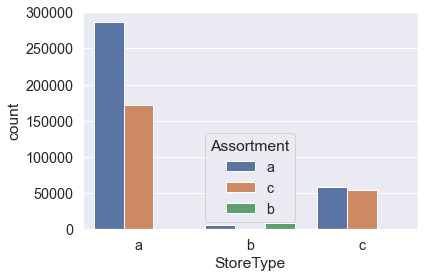

In [74]:
## Assortment: a = basic, b = extra, c = extended

sns.countplot(data = data, x = "StoreType", hue = "Assortment", order=["a","b","c"]) 

So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.

### lets check promotions

In [75]:
data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Avg_Customer_Sales           float64
dtype: object

**As we can see "Date" is in object format. Lets convert to datetime format**

In [76]:
data.Date = data.Date.astype("datetime64[ns]")

In [77]:
data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Avg_Customer_Sales                  float64
dtype: object

**Now lets split "Date" variable into seperate features for our analysis with promotion (promo) variable**

In [78]:
data["Month"] = data.Date.dt.month
data["Year"] = data.Date.dt.year
data["Day"] = data.Date.dt.day

In [79]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Avg_Customer_Sales', 'Month',
       'Year', 'Day'],
      dtype='object')

### Bivariate analysis for categorical variables using factorplot

#### factorplot() method is used to draw a categorical plot onto a FacetGrid.

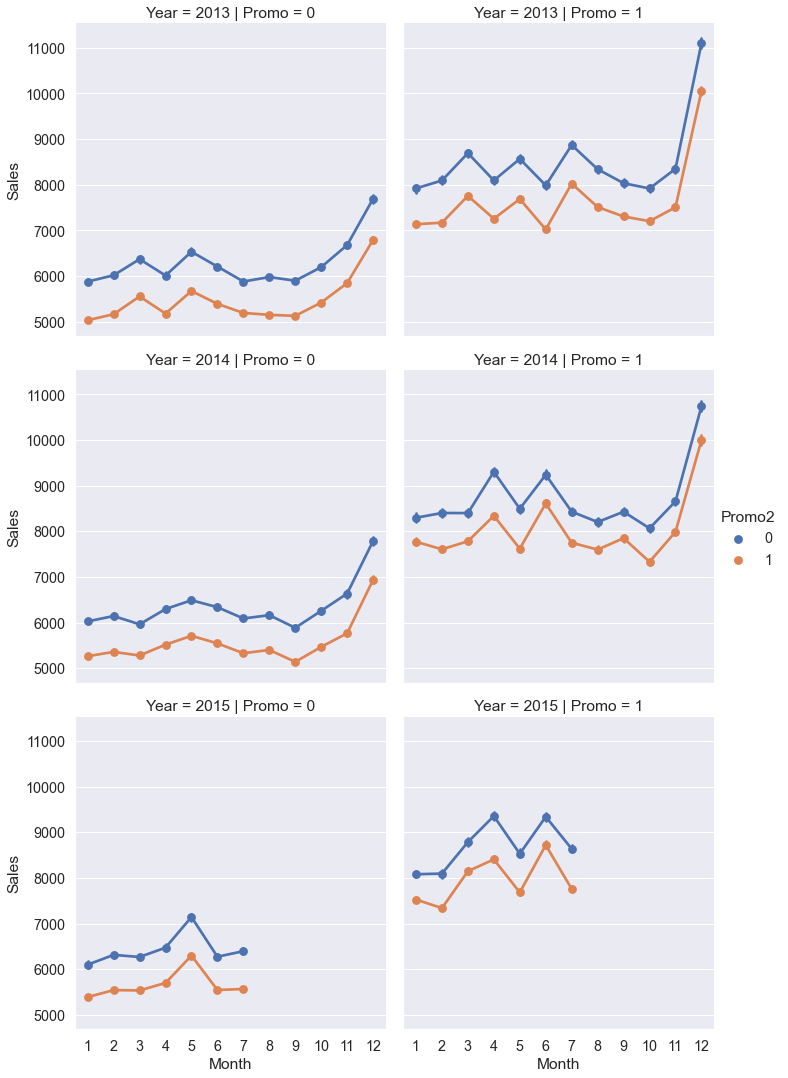

In [80]:
### Sales trend over the months 

# sns.factorplot(data=None, x=None, y=None, col=None, hue=None,  row=None)

#x, y : This parameter take names of variables in data, Inputs for plotting long-form data.
#hue : (optional)This parameter take column name for colour encoding
#data : This parameter take DataFrame, Long-form (tidy) dataset for plotting. Each column should correspond to a variable, and each row should correspond to an observation.
#row, col : (optional) This parameter take names of variables in data, Categorical variables that will determine the faceting of the grid.

sns.factorplot(data = data, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

**So, of course, if the stores are having promotion the sells are higher.**
**Overall the store promotions sellings are also higher than the seasionality promotions (Promo2).**
**We can see from the above trends that sales tend to spike in November and December. So, there is a seasonality factor present in the data.**

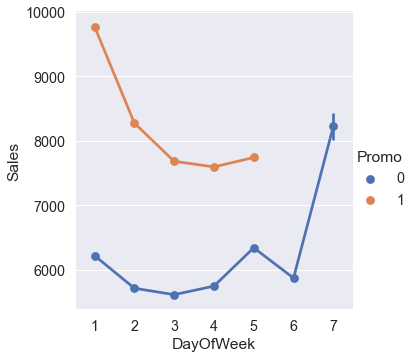

In [81]:
## Sales trend over days

sns.factorplot(data = data, x = "DayOfWeek", y = "Sales", hue = "Promo")

We can see from the trend that there are no promotions on the weekends i.e Saturday and Sunday, which makes sense as stores want to earn a maximum profit during the time when people do their house chores. The sales tend to increase on Sunday because people shop during the weekend. We can also see that the maximum sale happens on Mondays when there are promotional offers.

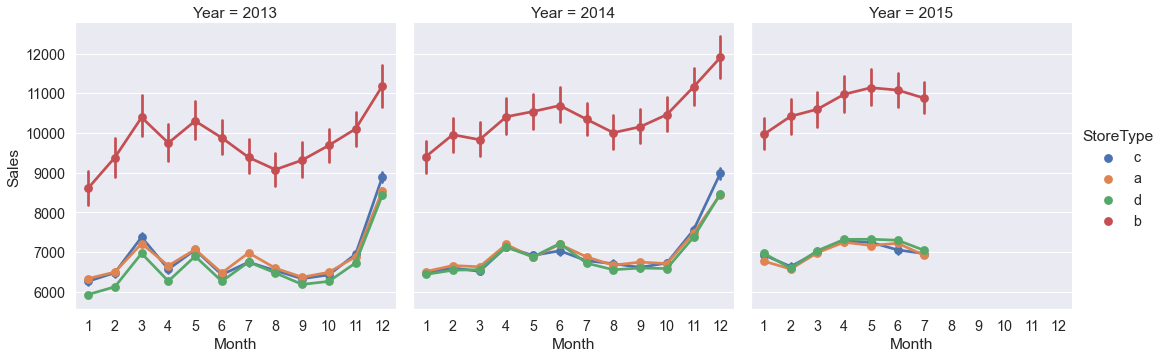

In [82]:
### Let's see the trends on a yearly basis.

sns.factorplot(data = data, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

**Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly.**

In [83]:
data.head().append(data.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Customer_Sales,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,9.342457,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,8.626118,7,2015,31
844387,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,0.0,0.0,0,5.962898,1,2013,1
844388,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,0.0,0.0,0,4.528818,1,2013,1
844389,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",4.034455,1,2013,1
844390,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,0.0,0.0,0,0.0,0.0,0,4.322425,1,2013,1
844391,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,3.0,2002.0,0,0.0,0.0,0,4.242705,1,2013,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        844392 non-null  float64 

#### Answering Hypothesis Questions:

**1. Which store type has more sales and customers?**

**Observation:** StoreType A has the most sells and customers.

**2. Which store type has less sales and customers?**

**Observation:** StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

**3. Which day of the week(Ex: Mon,Tues,Wed,Thus,Fri,Sat,Sun) customers sales are high?**

**Observation:** Customers tends to buy more on Mondays when there are ongoing promotional offers and on Thursdays/Fridays when there is no promotion at all.

**4. Are promotion(promo) and second promotion(promo2) are helping to make more sales?**

**Observation:** promo is helping for sales but Second promotion (Promo2) doesn't seem to contribute in the increase of sales.

**5. Which day of the week(Ex: Mon,Tues,Wed,Thus,Fri,Sat,Sun) promotions are more?**

**Observation:** Customers tends to buy more on Mondays when there are ongoing promotional offers

## Feature Engineering

### Converting Sales to SalesLog

**In this dataset we have to minimize Root Mean Squared Percentage Error(RMSPE). As I read the discussion on the Kaggle, I found that many machine learning algorithm doesn't support RMSPE as objective function. Thus to get a way around Sales is transformed using log1p.**

## Date features

**Creating seperate features from 'Date' Column**

### Using missing values

### KNN Imputation

### BayesianRidge Imputation 

### Let's convert categorical features into numerical (This should be done if we think these features are important for our model)

In [85]:
data['StateHoliday'].value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [86]:
# StateHoliday is a string and I for me is not so important to know what kind of holiday (a, b or c). 
# I will convert it into 0 and 1 into same variable

data["StateHoliday"] = data["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
data.StateHoliday.count()

844392

In [87]:
data['StateHoliday'].value_counts()

0    843482
1       910
Name: StateHoliday, dtype: int64

In [88]:
data['StoreType'].value_counts()

a    457077
d    258774
c    112978
b     15563
Name: StoreType, dtype: int64

In [89]:
data['Assortment'].value_counts()

a    444909
c    391271
b      8212
Name: Assortment, dtype: int64

In [90]:
data['PromoInterval'].value_counts()

0                   423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

### one hot encoding

In [91]:
data= pd.get_dummies(data,columns = ['StoreType','Assortment','PromoInterval'])
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,...,0,0,0,1,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,...,0,0,0,1,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,...,0,0,0,1,0,0,1,0,0,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Open                            844392 non-null  int64         
 6   Promo                           844392 non-null  int64         
 7   StateHoliday                    844392 non-null  int64         
 8   SchoolHoliday                   844392 non-null  int64         
 9   CompetitionDistance             844392 non-null  float64       
 10  CompetitionOpenSinceMonth       844392 non-null  float64

In [93]:
# I will use for prophet modeling
prophet_data = data.copy()

In [1]:
prophet_data.info()

NameError: name 'prophet_data' is not defined

### Lets go ahead with forecasting.

### ARIMA Forcasting

In [95]:
data = data.set_index("Date").resample("W").mean() # set the index to date and resample it by summing to weekly values

data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-06,557.926415,4.499665,5844.181391,695.728472,1.0,0.000000,0.00425,0.740103,5391.744576,4.932230,...,0.020801,0.130843,0.309774,0.532543,0.011407,0.456050,0.488929,0.116752,0.301051,0.093268
2013-01-13,558.500226,3.509099,7410.922244,786.035494,1.0,0.831102,0.00000,0.083471,5393.784028,4.949616,...,0.015792,0.130997,0.312378,0.535268,0.008422,0.456309,0.488344,0.117461,0.302752,0.091442
2013-01-20,558.582507,3.511121,5166.481064,632.062369,1.0,0.000000,0.00000,0.000000,5388.431019,4.945146,...,0.016381,0.130748,0.312444,0.534866,0.009017,0.456117,0.487977,0.117373,0.302525,0.092125
2013-01-27,558.609602,3.511178,6907.752288,739.509827,1.0,0.830758,0.00000,0.000000,5390.729182,4.941035,...,0.016804,0.130983,0.312528,0.533983,0.009452,0.456564,0.487322,0.117179,0.302026,0.093473
2013-02-03,558.099295,3.511174,5769.615869,676.113694,1.0,0.000000,0.00000,0.019199,5404.180291,4.930103,...,0.015749,0.131393,0.312434,0.533823,0.008400,0.457777,0.486426,0.117144,0.301035,0.095395


<AxesSubplot:xlabel='Date'>

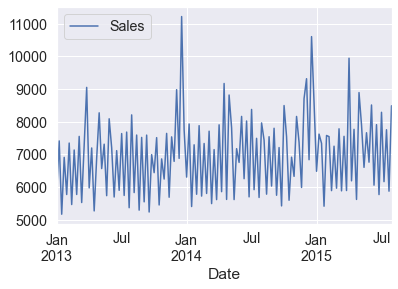

In [96]:
data1 = data[["Sales"]]

data1.plot()

In [97]:
print(data1.head())
print(data1.shape)

                  Sales
Date                   
2013-01-06  5844.181391
2013-01-13  7410.922244
2013-01-20  5166.481064
2013-01-27  6907.752288
2013-02-03  5769.615869
(135, 1)


In [98]:
data1.tail()

,Sales
Date,
2015-07-05,8287.273958
2015-07-12,6164.003276
2015-07-19,7753.193053
2015-07-26,5872.148286
2015-08-02,8487.138005


#### Multivariate Time Series

**A Multivariate TS is a time series with more than one time-dependent variable. Each variable depends on its past values but also has some dependency on other variables. This dependency is taken into account when predicting values. These variables can be endogenous or exogenous. I will be focusing on exogenous variables here.**

**An exogenous variable is one whose value is determined outside the model and is imposed on the model. In other words, variables that affect a model without being affected by it.**

In [99]:
exo = data[["Promo","Customers","Store"]] #considering only important features only to include exogenous variables 

# --------------OR-----------------

#data2 = data.loc[:, data.columns != 'Sales'] #Selecting all features except target or predicted variable i.e., 'Sales'


#data2.plot()

In [100]:
exo.head()

,Promo,Customers,Store
Date,,,
2013-01-06,0.000000,695.728472,557.926415
2013-01-13,0.831102,786.035494,558.500226
2013-01-20,0.000000,632.062369,558.582507
2013-01-27,0.830758,739.509827,558.609602
2013-02-03,0.000000,676.113694,558.099295


In [101]:
exo.tail()

,Promo,Customers,Store
Date,,,
2015-07-05,0.829315,807.595387,557.992560
2015-07-12,0.000000,696.880566,557.827848
2015-07-19,0.829308,782.120155,557.936047
2015-07-26,0.000000,667.143815,558.055440
2015-08-02,1.000000,809.028751,557.953279


In [102]:
exo.columns

Index(['Promo', 'Customers', 'Store'], dtype='object')

In [103]:
print(exo.shape)

(135, 3)


In [104]:
import statsmodels.api as sm

exog = sm.add_constant(exo)

In [105]:
print(exog)

            const     Promo   Customers       Store
Date                                               
2013-01-06    1.0  0.000000  695.728472  557.926415
2013-01-13    1.0  0.831102  786.035494  558.500226
2013-01-20    1.0  0.000000  632.062369  558.582507
2013-01-27    1.0  0.830758  739.509827  558.609602
2013-02-03    1.0  0.000000  676.113694  558.099295
...           ...       ...         ...         ...
2015-07-05    1.0  0.829315  807.595387  557.992560
2015-07-12    1.0  0.000000  696.880566  557.827848
2015-07-19    1.0  0.829308  782.120155  557.936047
2015-07-26    1.0  0.000000  667.143815  558.055440
2015-08-02    1.0  1.000000  809.028751  557.953279

[135 rows x 4 columns]


### Stationarity of Time Series

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time.

There are 2 ways to test the stationarity of time series

**a)** Rolling Mean: Visualization **b)** Dicky - Fuller test: Statistical test

**a) Rolling Mean:** A rolling analysis of a time series model is often used to assess the model's stability over time. The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.

**b) Dicky -Fuller test:** This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. The null hypothesis is that data is not stationary and the alternative hypothesis says that data is stationary. If p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data is stationary.

1) **Trend:** change in the graph upward or downward with respect to time period.

2) **Seasonality:** for instance: sudden increase in the cost of product like pizza, ice creams etc,.

In order to apply ARIMA the data need to be stationary, In the sense the data should not be changed with respect to time.

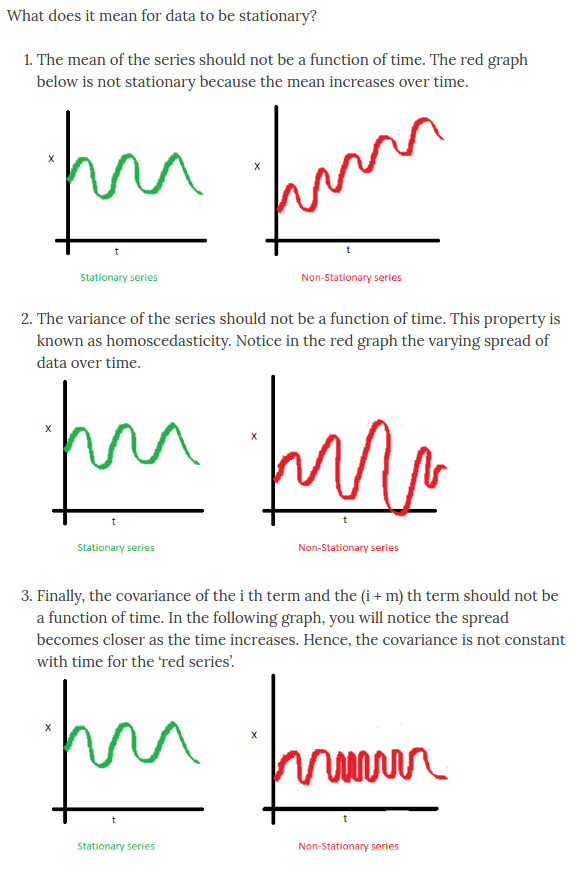

In [106]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\121.png')

If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. Most statistical modelling methods assume or require the time series to be stationary.

#### What is variance?

Variance is a measurement of the spread between numbers in a data set. The variance measures how far each number in the set is from the mean. The square root of variance is the standard deviation.

### Checking whether data is Stationary or not using Dickey-Fuller test.

In [107]:
# Function to test the stationarity

# If the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('\nResults of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('\np-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('\np-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

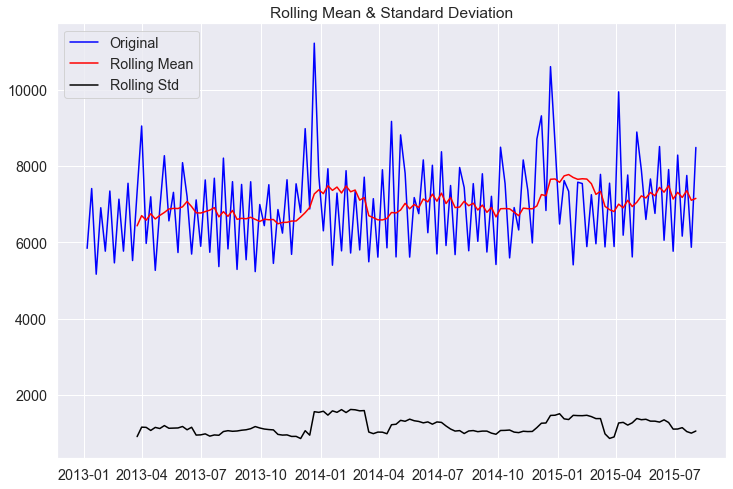


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.723656e+00
p-value                        3.432676e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [108]:
# Testing stationarity

test_stationarity(data1)

#### **NOTE**

**If the p-value is less than 5%(significance level) or If the Test Static value is greater than than the Critical value than our data is stationary**

In [109]:
from scipy import stats
from scipy.stats import normaltest
def residual_plot(model):

    resid = model.resid
    print(normaltest(resid))
    
    # returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
    # the residual is not a normal distribution

    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)

    sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(resid)

    #Now plot the distribution using 
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')

    # ACF and PACF
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

**We can see from the above plots and statistical tests that mean and variation doesn't change much with time, i.e they are constant. Thus, we don't need to perform any transformation (needed when time series is not stationary).**

### Let's check the trend and seasonality in our data.

Time series decomposition is the process of separating time series data into its core components. These components include a potential trend (overall rise or fall in the mean), seasonality (a recurring cycle), and the remaining random residual. Nearly all time series that you will come across are not n aturally stationary, meaning that the mean, variance, or covariance will be time dependent. This is why data scientists must identify and separate trends and seasonality from time series data before applying a model.

In [110]:
# Plotting seasonality and trend

from statsmodels.tsa.seasonal import seasonal_decompose

def plot_timeseries(sales):

    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',period=30)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[3].plot(data1['Sales'],'y' ,label='Original')
    axes[3].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[2].plot(estimated_residual, 'r',label='Residual')
    axes[2].legend(loc='upper left');

    plt.title('Decomposition Plots')

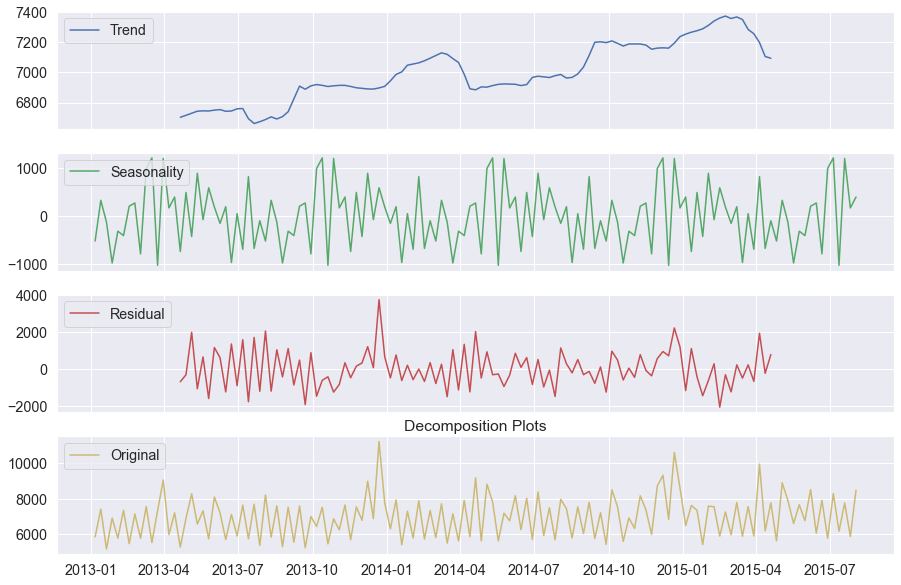

In [111]:
# Plotting seasonality and trend for store type 

plot_timeseries(data1['Sales'])

From the above plots, we can see that there is seasonality and trend present in our data. So, we'll use forecasting models that take both of these factors into consideration. For example, SARIMAX

As we can see from the graph, we are dealing with a seasonal Time Series. So I need to find the right parameters for the ARIMA Model as ARIMA(p,d,q)(P,D,Q)s. Here (p,d,q) are the non-seasonal parameter, while (P,D,Q) follow the same defintion, but are for the seasonal component of the series. The term s, is the periodicity (4 for the quarerly periods, 12 for yearly periods, etc.)

p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

### I am still making data more stationary

#### So now we need to transform the data to make it more stationary. There are various transformations you can do to stationarize the data. The first thing we want to do is take a first difference of the data. This should help to eliminate the overall trend from the data.

To get a stationary data, there's many techiniques. We can use log, differencing etc...

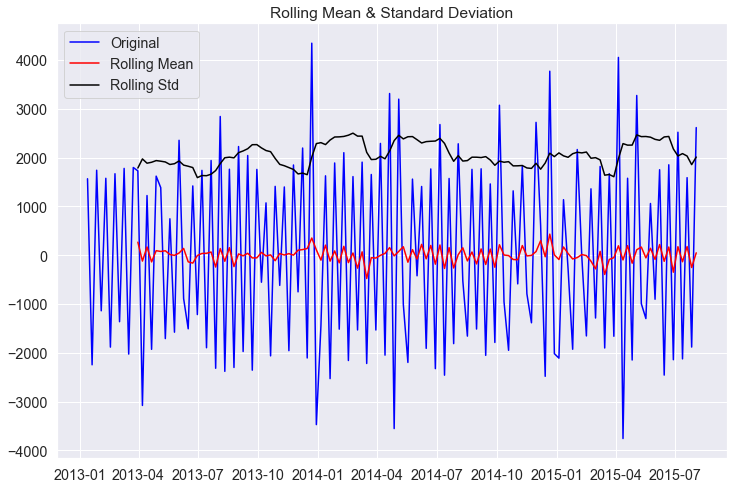


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.444766e+00
p-value                        1.575850e-08
#Lags Used                     7.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


In [112]:
# This is for reducing trend and seasonality

first_diff = data1 - data1.shift(1) # Shifting by 1 i.e., t-1

first_diff = first_diff.dropna(inplace = False) # Dropping NaN values in our data

test_stationarity(first_diff, window = 12) # Checking stationarity of data

In [113]:
first_diff.head()
#data1.head()

,Sales
Date,
2013-01-13,1566.740853
2013-01-20,-2244.441180
2013-01-27,1741.271224
2013-02-03,-1138.136419
2013-02-10,1575.951962


In [114]:
#first_diff = pd.DataFrame(first_diff)
#first_diff

In [115]:
#first_diff.reset_index(level=0, inplace=True)

In [116]:
#first_diff

In [117]:
#first_diff = first_diff.set_index("Date")
#first_diff

### We can use Log Scale Transformation from numpy package to transform time series into logarithmic scale.

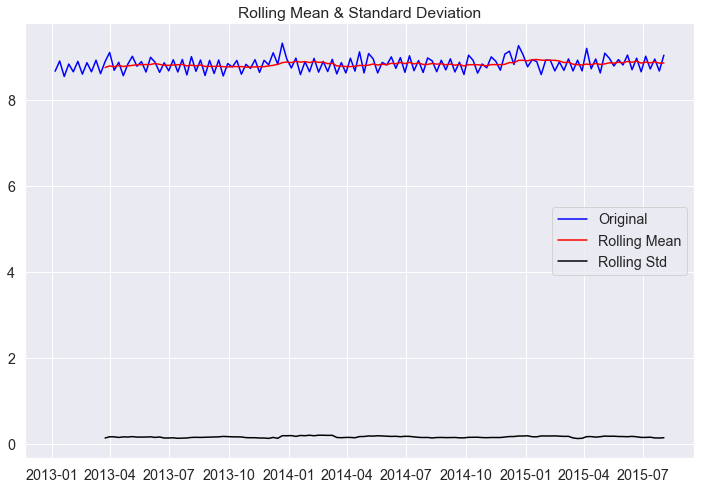


Results of Dickey-Fuller Test:

p-value = 0.0069. The series is likely stationary.
Test Statistic                  -3.547094
p-value                          0.006857
#Lags Used                       8.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [118]:
data_logScale = np.log(data1.Sales)
test_stationarity(data_logScale)

**From the logarithmic scale transformation, we can observe a smoother trend on the rolling mean and rolling standard deviation which suggests that time series is stationarity.**

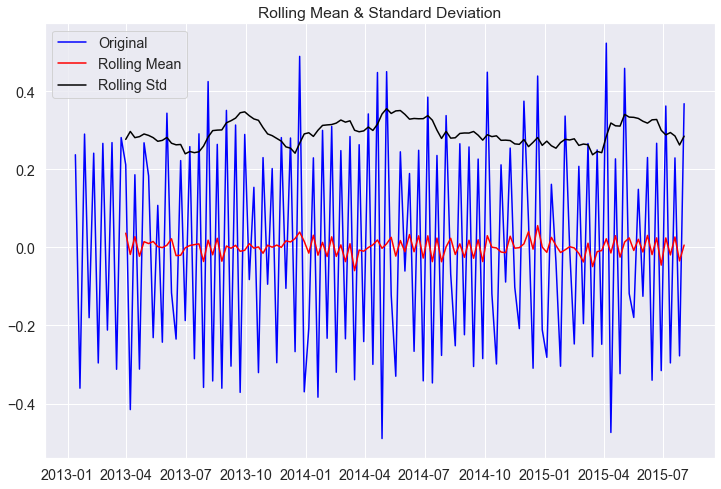


Results of Dickey-Fuller Test:

p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.348127e+00
p-value                        2.651660e-08
#Lags Used                     7.000000e+00
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


In [119]:
data_logScale_1stdiff = data_logScale - data_logScale.shift(1)
data_logScale_1stdiff = data_logScale_1stdiff.dropna(inplace=False)
test_stationarity(data_logScale_1stdiff)

**For more data transformations this is good resourse https://github.com/DataForScience/Timeseries

### Evaluation Metrics

There are two popular metrics used in measuring the performance of regression (continuous variable) models i.e MAE & RMSE.

**MAE** - Mean Absolute Error: It is the average of the absolute difference between the predicted values and observed values.

**RMSE** - Root Mean Square Error: It is the square root of the average of squared differences between the predicted values and observed values.

MAE is easier to understand and interpret but RMSE works well in situations where large errors are undesirable. This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, RMSE suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory can be managed properly.

So, let's choose **RMSE as a metric to measure the performance of our models.**

### Model 1 - ARIMA (Autoregressive Integrated Moving Average)

In order to use this model, we need to first find out values of p, d and q. p represents number of Autoregressive terms - lags of dependent variable. q represents number of Moving Average terms - lagged forecast errors in prediction equation. d represents number of non-seasonal differences.

To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.

**ACF**(Auto Corelation Function) - measure of correlation between time series with a lagged version of itself. 

**PACF**(Partial Auto Corelation Function) - measure of correlation between time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.

p value is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time. q value is the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.

Now, let's plot these graphs.

**PACF- AR model**

**ACF- MA model**

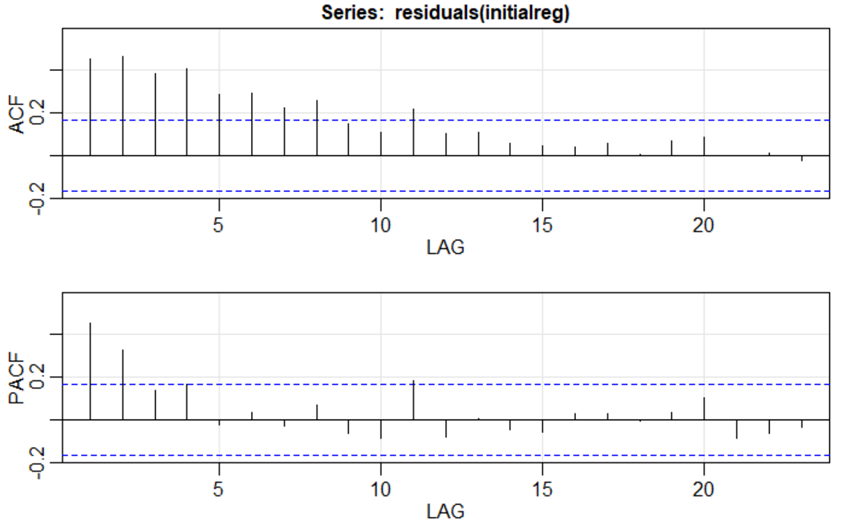

In [120]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\131.png')

By the above images we can observe that, the lines which crosses the blue dotted lines in PACF and ACF those lines are considered to be that many days are required to predict the todays value. For example in above PACF plot that has only three lines which crossed the blue dotted lines so last three days values are required to predict the todays value, similarly ACF plot also but for model we should not consider ACF-MA model because many lines crossed the blue threshold line, so it will create the model complex. So we should select only PACF-AR model to predict

In [121]:
# Autocorrelation function to make ACF and PACF graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.stattools import acf,pacf

def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color ='red')
    plt.title('PACF')

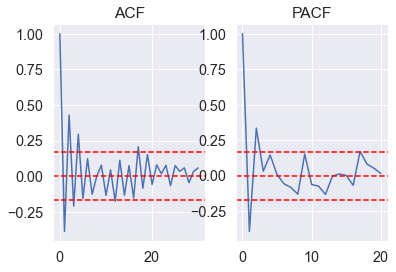

In [122]:
# ACF and PACF 

auto_corr(data1)

#### ------------------------------OR------------------------------------

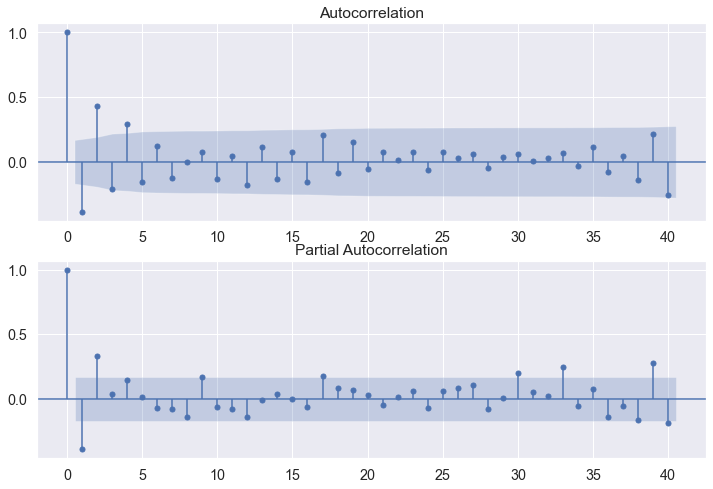

In [123]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1.Sales, lags=40, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1.Sales, lags=40, ax=ax2)      #lags=40

#### How to determin p, d, q

In our case, we see the first order differencing make the ts stationary. d = 1.

In our case, it's clearly that within 6 lags the AR is significant. Which means, we can use AR = 6 (6 lines are crossed the blue lines so 6past days are required to predict)

To avoid the potential for incorrectly specifying the MA order (in the case where the MA is first tried then the MA order is being set to 0) then 1, then 2, it may often make sense to extend the lag observed from the last significant term in the PACF.

From above graphs its hard to find p,q but let's do a grid search and see which combination of p, q and d gives the lowest Akaike information criterion (AIC, which tells us the quality of statistical models for a given set of data. Best model uses the lowest number of features to fit the data.

In [124]:
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

arima_model = sm.tsa.ARIMA(data1, (6,1,2)).fit(disp=False)

print(arima_model.summary())

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  134
Model:                 ARIMA(6, 1, 2)   Log Likelihood               -1117.221
Method:                       css-mle   S.D. of innovations            983.669
Date:                Wed, 09 Jun 2021   AIC                           2254.442
Time:                        15:48:02   BIC                           2283.421
Sample:                    01-13-2013   HQIC                          2266.218
                         - 08-02-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1640      2.421      2.133      0.033       0.419       9.909
ar.L1.D.Sales    -1.2506      0.086    -14.508      0.000      -1.420      -1.082
ar.L2.D.Sales    -0.0183      0.139     

#### Analyze the result

To see how our first model perform, we can plot the residual distribution. See if it's normal dist. And the ACF and PACF. For a good model, we want to see the residual is normal distribution. And ACF, PACF has not significant terms.

NormaltestResult(statistic=30.14349992108014, pvalue=2.847227433486147e-07)


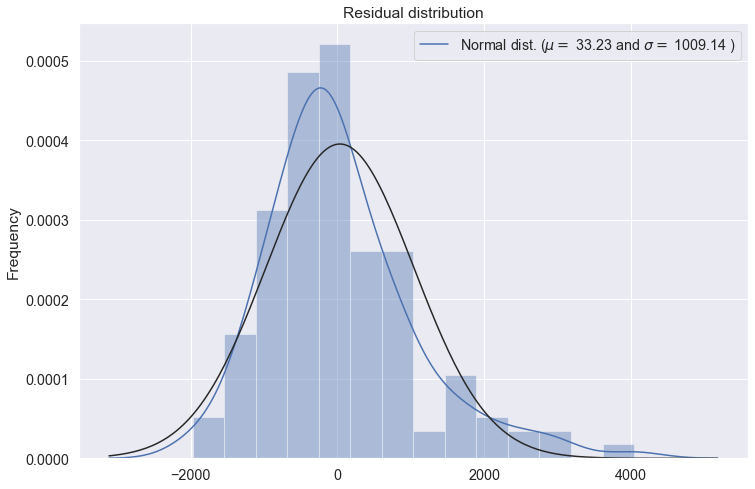

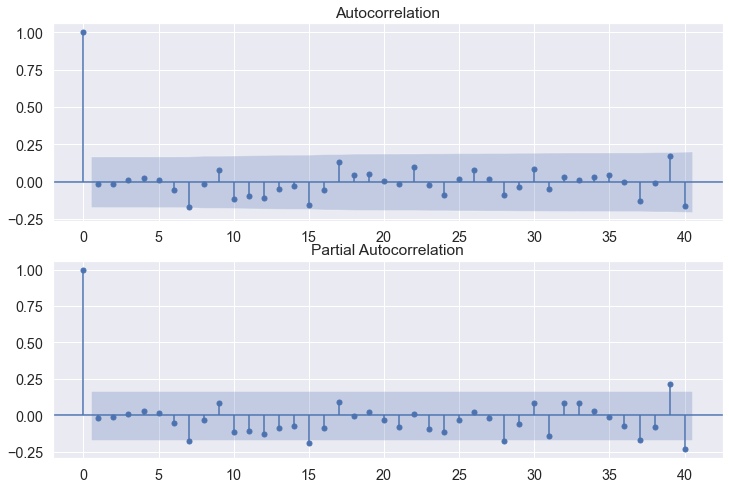

In [125]:
residual_plot(arima_model)

Although the graph looks very like a normal distribution. But it failed the test. Also we see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality.

When the plots of ACF and PACF are similar or any sesaonality is present between them than we need to apply SARIMA model, which it is extended model of ARIMA

#### What is SARIMA and what is the use of it ?

ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting, but it does not support time series with a seasonal component. The ARIMA model is extended (SARIMA) to support the seasonal component of the series. SARIMA (Seasonal Autoregressive Integrated Moving Average), method for time series forecasting is used on univariate data containing trends and seasonality. SARIMA is composed of trend and seasonal elements of the series.

Some of the parameters that are same as ARIMA model are: p: Trend autoregression order. d: Trend difference order. q: Trend moving average order There are four seasonal elements that are not part of ARIMA are: P: Seasonal autoregressive order. D: Seasonal difference order. Q: Seasonal moving average order. m: The number of time steps for a single seasonal period. Thus SARIMA model can be specified as: SARIMA (p, d, q) (P,D,Q) m

If m is 12, it specifies monthly data suggests a yearly seasonal cycle. SARIMA time series models can also be combined with spatial and event based models to yield ensemble models that solves multi-dimensional ML problems. Such a ML model can be designed to predict cell load in cellular networks at different times of the day round the year as illustrated below in the sample figure Autocorrelation, trend, and seasonality (weekday , weekend effects) from time series analysis can be used to interpret temporal influence. Regional and cell wise load distribution can be used to predict sparse and over loaded cells in varying intervals of time. Events (holidays, special mass gatherings and others) can be predicted using decision trees.

### Auto ARIMA

In [126]:
#!pip install pmdarima

In [127]:
#import warnings
#import statsmodels.api as sm
#import pmdarima as pm

#model = pm.auto_arima(data1,
#                        m=12, seasonal=True,
#                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
#                           suppress_warnings=True,
#                      stepwise=True, trace=True)

In [128]:
#model.summary()

In [129]:
#auto_arima = model.fit(data1,disp=False)

In [130]:
#print(auto_arima.summary().tables[1])

### Model - 2 SARIMA (Seasonal Autoregressive Integrated Moving Average)

### Hyperparamter tuning ARIMA model

As discussed above, we have three parameters (p, d and q) for SARIMA model. So, in order to choose the best combination of these parameter, we'll use a grid search. The best combination of parameters will give the lowest AIC score.

In [131]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**Now, let's iterate through these combinations to see which one gives the lowest AIC score.**

In [134]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import  ARIMA

# Determing p,d,q combinations with AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1, # variables to be predicted i.e., Sales
                                            order = param,
                                            exog = exog, # exogenous variables
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit(maxiter=200) #
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1805.999133690495
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1647.5953103418965
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1689.6839550169489
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1495.327655790517
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1662.1639336311305
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1637.0604885512673
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.044349577836
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1474.5641049323697


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1761.533887743922
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1605.6697263450812
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1659.383162761696
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1468.7555410268958
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1634.5024373676013
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1607.0464654580783
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1484.0296301212802
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1458.0619549209011
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1748.119843190139
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1590.832958945398
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1670.9928068626932
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1452.9702713026218
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1604.4328398341743
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1592.6796119187923
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1500.797289953645
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1453.8532121698381
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1685.344745490056
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1533.91727457781


In [135]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -690.221
Date:                            Wed, 09 Jun 2021   AIC                           1398.442
Time:                                    15:50:17   BIC                           1422.581
Sample:                                01-06-2013   HQIC                          1408.229
                                     - 08-02-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0588   3.11e+04  -1.89e-06      1.000    -6.1e+04     6.1e+04
Promo        548.3273     48.811   

**We can see from the above grid search that our optimal parameter combination is SARIMAX(1, 1, 1)x(1, 1, 1, 12) - AIC:1396.442. So, let's use this in our model.**

In [216]:
data.tail(7)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-21,558.436867,3.516677,7908.791691,792.126712,1.0,0.829363,0.0,0.000000,5428.671828,4.934336,...,0.017719,0.132222,0.311346,0.530077,0.009381,0.460542,0.488535,0.116289,0.300179,0.094997
2015-06-28,558.325097,3.517267,5768.051206,662.888508,1.0,0.000000,0.0,0.000000,5429.934504,4.932867,...,0.017714,0.132182,0.311253,0.530217,0.009378,0.460405,0.488687,0.116255,0.300089,0.094969
2015-07-05,557.992560,3.516518,8287.273958,807.595387,1.0,0.829315,0.0,0.212798,5437.668155,4.931399,...,0.017708,0.132143,0.311161,0.530655,0.009375,0.459970,0.489286,0.115774,0.300000,0.094940
2015-07-12,557.827848,3.516307,6164.003276,696.880566,1.0,0.000000,0.0,0.212956,5436.455696,4.934177,...,0.017722,0.132241,0.311392,0.530901,0.009382,0.459717,0.489352,0.115413,0.300223,0.095011
2015-07-19,557.936047,3.516398,7753.193053,782.120155,1.0,0.829308,0.0,0.372838,5431.814252,4.933065,...,0.017740,0.132379,0.311717,0.530262,0.009392,0.460346,0.489117,0.115236,0.300537,0.095110
2015-07-26,558.055440,3.516692,5872.148286,667.143815,1.0,0.000000,0.0,0.521162,5421.704918,4.929806,...,0.017735,0.132340,0.311624,0.529657,0.009389,0.460954,0.488972,0.115499,0.300447,0.095082
2015-08-02,557.953279,3.000000,8487.138005,809.028751,1.0,1.000000,0.0,0.798922,5385.745732,4.930818,...,0.015274,0.132974,0.312668,0.530997,0.008086,0.460916,0.487871,0.115903,0.300988,0.095238


In [217]:
#train = data[(data.index.get_level_values(0) >= '2013-01-06') & (data.index.get_level_values(0) <= '2015-06-21')]
#test = data[(data.index.get_level_values(0) > '2015-06-21')]

##---------------------OR---------------------
#train_ind = int(len(data)*0.8)

#train = data[:train_ind]
#test = data[train_ind:]

##---------------------OR---------------------

train = data.iloc[:-6]
test = data.iloc[-6:]

In [218]:
test

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-28,558.325097,3.517267,5768.051206,662.888508,1.0,0.000000,0.0,0.000000,5429.934504,4.932867,...,0.017714,0.132182,0.311253,0.530217,0.009378,0.460405,0.488687,0.116255,0.300089,0.094969
2015-07-05,557.992560,3.516518,8287.273958,807.595387,1.0,0.829315,0.0,0.212798,5437.668155,4.931399,...,0.017708,0.132143,0.311161,0.530655,0.009375,0.459970,0.489286,0.115774,0.300000,0.094940
2015-07-12,557.827848,3.516307,6164.003276,696.880566,1.0,0.000000,0.0,0.212956,5436.455696,4.934177,...,0.017722,0.132241,0.311392,0.530901,0.009382,0.459717,0.489352,0.115413,0.300223,0.095011
2015-07-19,557.936047,3.516398,7753.193053,782.120155,1.0,0.829308,0.0,0.372838,5431.814252,4.933065,...,0.017740,0.132379,0.311717,0.530262,0.009392,0.460346,0.489117,0.115236,0.300537,0.095110
2015-07-26,558.055440,3.516692,5872.148286,667.143815,1.0,0.000000,0.0,0.521162,5421.704918,4.929806,...,0.017735,0.132340,0.311624,0.529657,0.009389,0.460954,0.488972,0.115499,0.300447,0.095082
2015-08-02,557.953279,3.000000,8487.138005,809.028751,1.0,1.000000,0.0,0.798922,5385.745732,4.930818,...,0.015274,0.132974,0.312668,0.530997,0.008086,0.460916,0.487871,0.115903,0.300988,0.095238


In [219]:
train.shape

(129, 29)

In [220]:
test.shape

(6, 29)

In [221]:
exog.shape

(135, 4)

### Fitting the model - using hyperparamters tuned above

In [238]:

model = ARIMA(train['Sales'],order=(1, 1, 1))# # disp=False

model = mod.fit()

model.summary()


C:\Users\karth\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -690.326
Date:                            Wed, 09 Jun 2021   AIC                           1398.651
Time:                                    16:38:48   BIC                           1422.790
Sample:                                01-06-2013   HQIC                          1408.439
                                     - 08-02-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0265   2.72e+04  -9.75e-07      1.000   -5.33e+04    5.33e+04
Promo        530.6866     47.981     11.060      0.000     436.646     624.728
Customers     12.7356      0.245     51.919      0.000      12.255      13.216
Store        -19.5951     37.992     -0.516      0.606     -94.058      54.868
ar.L1         -0.1677      0.154     -1.091      0.275      -0.469       0.134
ma.L1         -0.5509      0.125     -4.390      0.000      -0.797      -0.305
ar.S.L12      -0.0548      0.120     -0.459      0.647      -0.289       0.180
ma.S.L12      -1.0033      7.246     -0.138      0.890     -15.205      13.198
sigma2      1.732e+04   1.27e+05      0.136      0.892   -2.32e+05    2.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.97   Prob(JB):                         0.27
Heteroskedasticity (H):               1.43   Skew:                             0.31
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
start = len(train)
end = len(train) + len(test) - 1

pred = model.predict(start = start, end = end, typ = 'levels',exog = exog)
#pred = np.exp(pred)

In [240]:
print(pred)

Date
2015-06-28    5767.947683
2015-07-05    7996.516613
2015-07-12    6258.459485
2015-07-19    7823.969218
2015-07-26    5856.477498
2015-08-02    8192.509030
Freq: W-SUN, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

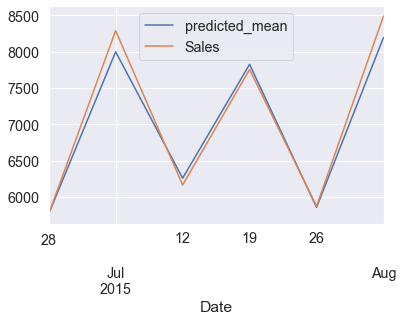

In [241]:
pred.plot(legend = True)
test['Sales'].plot(legend = True)

In [242]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['Sales']))
rmse

175.8422077370025

In [243]:
#model2 = ARIMA(data['Sales'],order=(1, 1, 1))# # disp=False
#model2 = model2.fit()
data.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-05,557.992560,3.516518,8287.273958,807.595387,1.0,0.829315,0.0,0.212798,5437.668155,4.931399,...,0.017708,0.132143,0.311161,0.530655,0.009375,0.459970,0.489286,0.115774,0.300000,0.094940
2015-07-12,557.827848,3.516307,6164.003276,696.880566,1.0,0.000000,0.0,0.212956,5436.455696,4.934177,...,0.017722,0.132241,0.311392,0.530901,0.009382,0.459717,0.489352,0.115413,0.300223,0.095011
2015-07-19,557.936047,3.516398,7753.193053,782.120155,1.0,0.829308,0.0,0.372838,5431.814252,4.933065,...,0.017740,0.132379,0.311717,0.530262,0.009392,0.460346,0.489117,0.115236,0.300537,0.095110
2015-07-26,558.055440,3.516692,5872.148286,667.143815,1.0,0.000000,0.0,0.521162,5421.704918,4.929806,...,0.017735,0.132340,0.311624,0.529657,0.009389,0.460954,0.488972,0.115499,0.300447,0.095082
2015-08-02,557.953279,3.000000,8487.138005,809.028751,1.0,1.000000,0.0,0.798922,5385.745732,4.930818,...,0.015274,0.132974,0.312668,0.530997,0.008086,0.460916,0.487871,0.115903,0.300988,0.095238


In [244]:
forecast_range = pd.date_range(start='2015-08-02', periods=6,freq='W') 

pred = model.predict(start = len(data), end = len(data) + 5 ,typ = 'levels',exog = exog[129:],dynamic = True).rename('ARIMA Predictions')
#print(pred)
pred.index = forecast_range
print(pred)

2015-08-02    5868.261152
2015-08-09    8268.888482
2015-08-16    6374.140735
2015-08-23    7920.842269
2015-08-30    5941.238720
2015-09-06    8380.348994
Freq: W-SUN, Name: ARIMA Predictions, dtype: float64


In [245]:
pred.shape

(6,)

In [246]:
forecast_range = pd.date_range(start='2015-08-02', periods=6,freq='W')
forecast_range

DatetimeIndex(['2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23',
               '2015-08-30', '2015-09-06'],
              dtype='datetime64[ns]', freq='W-SUN')

In [247]:
forecast1_df = pd.DataFrame(pred, index = forecast_range,columns=['Prediction'])

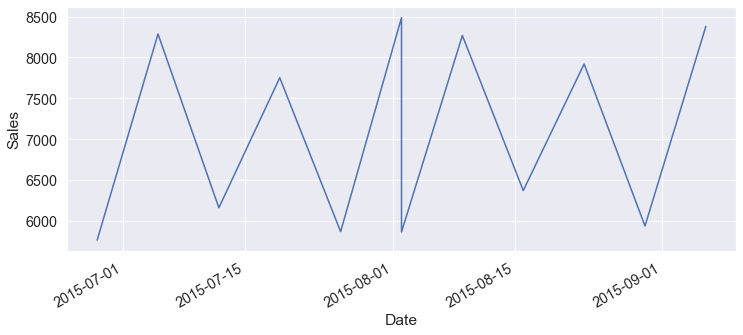

In [250]:
out = pd.concat([test['Sales'],pred]) #,axis=1
out.plot(figsize = (12,5),legend = False)
plt.xlabel("Date")
plt.ylabel("Sales")

plt.legend
plt.show()

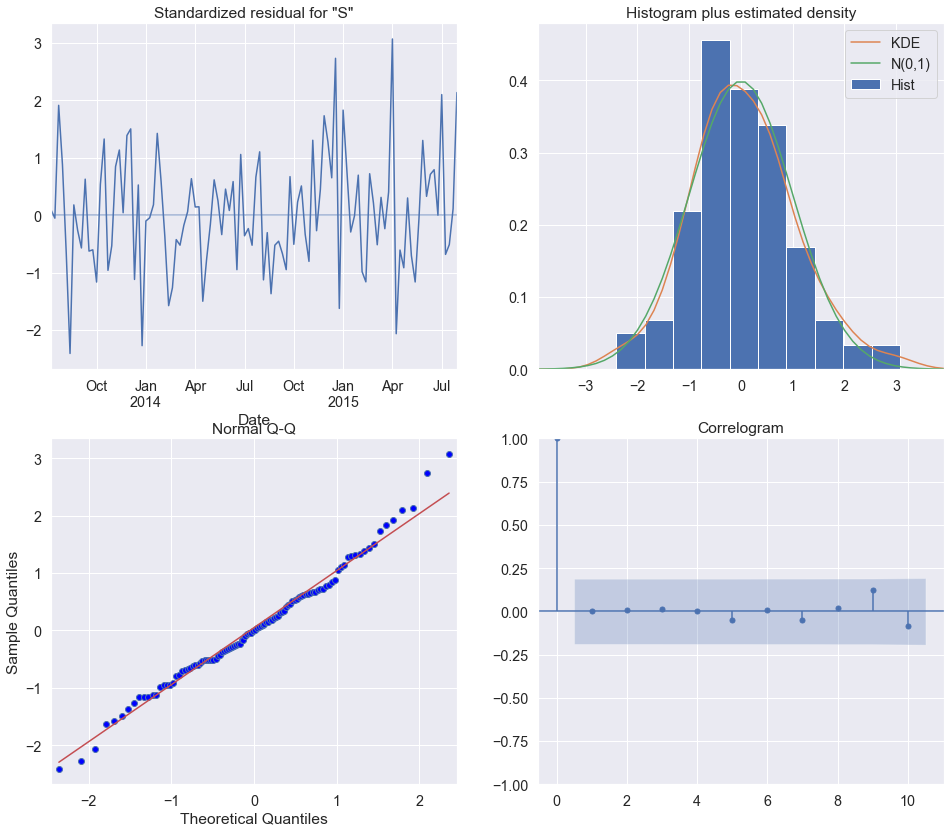

In [166]:
model.plot_diagnostics(figsize=(16, 14))
plt.show()

In [167]:
print(test.shape,pred.shape)

(6, 29) (6,)


In [168]:
rmse = sqrt(mean_squared_error(pred,test['Sales']))
rmse

128.33644006372722

In [169]:
# creating the mean absolute percentage error

def mean_absolute_percentage_error(arima_truth, arima_forecasted): 
    arima_truth, arima_forecasted = np.array(arima_truth), np.array(arima_forecasted)
    return np.mean(np.abs((arima_truth - arima_forecasted) / arima_truth)) * 100

# Calculating the error

mape = mean_absolute_percentage_error(test['Sales'], pred)
print("Mean Absolute Percentage Error: ", mape)

Mean Absolute Percentage Error:  1.6609058230761544
